## Observations and Insights

## Dependencies and starter code

In [318]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import sem
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_metadata.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17


In [319]:
study_results.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0


In [320]:
dataframe = pd.merge(mouse_metadata, study_results, on = ["Mouse ID"])

# dataframe.sort_values(by='Tumor Volume (mm3)', ascending=True)
dataframe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [321]:
# Generate a summary statistics table of mean, median, variance,
#standard deviation, and SEM of the tumor volume for each regimen

# data_mean = dataframe.mean()

mean = dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard = dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

new_dataframe3 = pd.DataFrame()

new_dataframe3["Mean"] = mean
new_dataframe3["Median"] = median
new_dataframe3["Variance"] = variance
new_dataframe3["std"] = standard
new_dataframe3["sem"] = sem

new_dataframe3

,Mean,Median,Variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

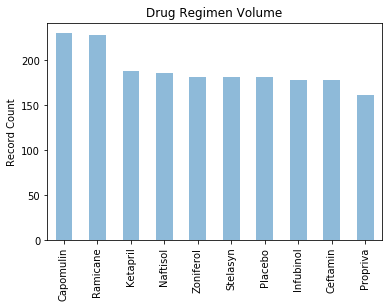

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Mouse ID, dtype: int64

In [322]:
# Generate a bar plot showing number of data points
#for each treatment regimen using pandas

df = dataframe[["Mouse ID", "Drug Regimen"]]

pandas_drug = df.groupby(["Drug Regimen"])["Mouse ID"].count().sort_values(ascending=False)

# with Pandas (dataframe.plot)
title = "Drug Regimen Volume"
pandas_drug.plot(x="Drug Regimen", y= "Mouse ID", kind="bar", alpha=0.5, title=title)  # Create bar chart
plt.xlabel("")                            # Set x label
plt.ylabel("Record Count")  # Set y label
plt.show()

pandas_drug

Text(0, 0.5, 'Record Count')

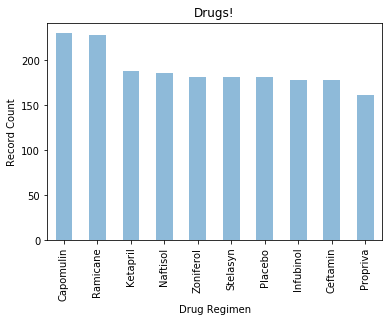

In [323]:
# Generate a bar plot showing number of data points for each
#treatment regimen using pyplot

pandas_drug.plot.bar(x = "Drug Regimen", y = "Mouse ID", alpha = 0.5, rot = 0 )
plt.xticks(rotation="vertical")     
plt.title("Drugs!") 
plt.ylabel("Record Count") 

In [324]:
dataframe.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0


## Pie plots

In [325]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_counts = dataframe['Sex'].value_counts()

gender_counts

Male      958
Female    935
Name: Sex, dtype: int64

In [326]:
#Group data by 'Sex'and summing the 'Drug Regimen' column (for each group)
gender_distribution = dataframe.groupby('Sex')['Drug Regimen'].count()

# listing results
gender_distribution

Sex
Female    935
Male      958
Name: Drug Regimen, dtype: int64

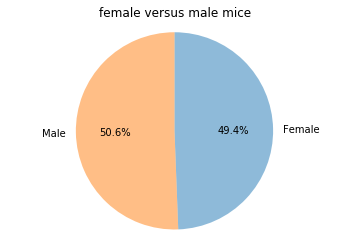

In [327]:
# Create pie chart of the total 'tripduration' by 'gender' (for the specific 'bikeid')
gender_distribution.plot(kind="pie", autopct="%1.1f%%", counterclock=False, startangle=90, wedgeprops={'alpha':0.5})

# Set text properties
plt.title("female versus male mice")
plt.ylabel("")
plt.axis("equal")

# Show chart
plt.show()

In [328]:
sex = ["Male", "Female"]
gender_count = [958, 935]
colors = ["lightcoral", "yellowgreen"]

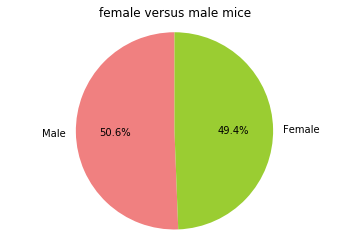

In [329]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.title("female versus male mice")
plt.pie(gender_count, labels=sex, colors=colors,
        autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.show()


## Quartiles, outliers and boxplots

In [330]:
#grabbing 4 most promising here

new_dataframe3.sort_values(by='Mean', ascending=True).head(4)


,Mean,Median,Variance,std,sem
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821


In [331]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers

cap_df = dataframe.loc[dataframe["Drug Regimen"] == "Capomulin",:]
ram_df = dataframe.loc[dataframe["Drug Regimen"] == "Ramicane", :]
prop_df = dataframe.loc[dataframe["Drug Regimen"] == "Propriva", :]
ceft_df = dataframe.loc[dataframe["Drug Regimen"] == "Ceftamin", :]


In [332]:
#filtering for max timepoint 

capmax = cap_df.groupby('Mouse ID')['Timepoint'].max()

#creating new dataframe 
capmaxvol = pd.DataFrame(capmax)

#merging original dataframe to filter all other columns to max timepoint
capmaxmerge = pd.merge(capmaxvol, dataframe, on=("Mouse ID","Timepoint"))

capmaxmerge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [333]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers.


#Capolmulin Merge
final_tumors1 = capmaxmerge['Tumor Volume (mm3)']

quartiles = final_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
The the median of tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [334]:
#setting up same formula for remaining drugs

#filtering for max timepoint 

rammax = ram_df.groupby('Mouse ID')['Timepoint'].max()

#creating new dataframe 
rammaxvol = pd.DataFrame(rammax)

#merging original dataframe to filter all other columns to max timepoint
rammaxmerge = pd.merge(rammaxvol, dataframe, on=("Mouse ID","Timepoint"))

rammaxmerge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [335]:
#Ramicane Merge

final_tumors2 = rammaxmerge['Tumor Volume (mm3)']

quartiles = final_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
The the median of tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [336]:
#filtering for max timepoint 

propmax = prop_df.groupby('Mouse ID')['Timepoint'].max()

#creating new dataframe 
propmaxvol = pd.DataFrame(propmax)

#merging original dataframe to filter all other columns to max timepoint
propmaxmaxmerge = pd.merge(propmaxvol, dataframe, on=("Mouse ID","Timepoint"))

propmaxmaxmerge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a699,45,Propriva,Female,5,28,62.191414,1
1,c927,40,Propriva,Female,4,26,64.183229,4
2,g558,40,Propriva,Male,8,29,61.774963,4
3,g570,45,Propriva,Male,16,29,70.492788,2
4,g989,35,Propriva,Female,21,26,62.570880,2


In [337]:
#Propriva Merge

final_tumors3 = propmaxmaxmerge['Tumor Volume (mm3)']

quartiles = final_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
The the median of tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [338]:
#filtering for max timepoint 

ceftmax = ceft_df.groupby('Mouse ID')['Timepoint'].max()

#creating new dataframe 
ceftmaxvol = pd.DataFrame(ceftmax)

#merging original dataframe to filter all other columns to max timepoint
ceftmaxmerge = pd.merge(ceftmaxvol, dataframe, on=("Mouse ID","Timepoint"))

ceftmaxmerge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [339]:
#Ceftamin Merge

final_tumors4 = ceftmaxmerge['Tumor Volume (mm3)']

quartiles = final_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
The the median of tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


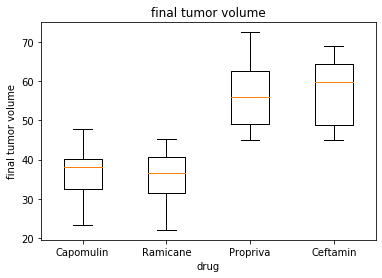

In [340]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

tumors_to_plot = [final_tumors1, final_tumors2, final_tumors3, final_tumors4]

fig, ax1 = plt.subplots()
ax1.boxplot(tumors_to_plot, labels=["Capomulin","Ramicane","Propriva","Ceftamin"])
ax1.set_ylabel("final tumor volume")
ax1.set_xlabel("drug")

ax1.set_title('final tumor volume')

plt.show()

## Line and scatter plots

In [341]:
cap_df.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0


In [342]:
# Generate a line plot of time point versus tumor volume
#for a mouse treated with Capomulin

capomulin_df = cap_df.loc[cap_df["Mouse ID"] == "s185"]



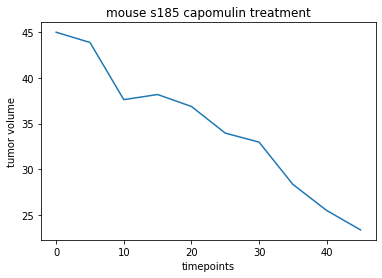

In [343]:
#creating x and y data from capomulin_df 

mouse_cap = capomulin_df["Timepoint"]

line_plot = capomulin_df["Tumor Volume (mm3)"]

plt.plot(mouse_cap,line_plot)
plt.title('mouse s185 capomulin treatment')
plt.xlabel('timepoints')
plt.ylabel('tumor volume')

plt.show()

In [344]:
cap_df.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0


In [345]:
# Generate a scatter plot of mouse weight versus average tumor volume
#for the Capomulin regimen

avg_tumor = cap_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

avg_weight = cap_df.groupby('Mouse ID')['Weight (g)'].mean()

weight_v_tumor = pd.DataFrame()
weight_v_tumor['AVG Tumor Volume (mm3)'] = avg_tumor
weight_v_tumor['AVG Weight (g)'] = avg_weight

weight_v_tumor

,AVG Tumor Volume (mm3),AVG Weight (g)
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22
i557,44.805810,24
i738,39.141053,20
j119,44.465236,23
j246,43.216925,21


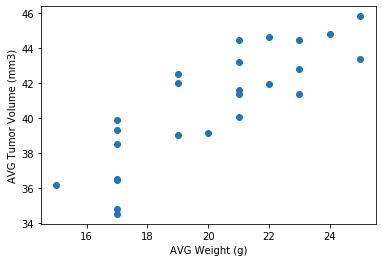

In [346]:
plt.scatter(weight_v_tumor['AVG Weight (g)'],weight_v_tumor['AVG Tumor Volume (mm3)'])

plt.xlabel('AVG Weight (g)')
plt.ylabel('AVG Tumor Volume (mm3)')

plt.show()

In [347]:
weight_v_tumor.head(2)

,AVG Tumor Volume (mm3),AVG Weight (g)
Mouse ID,,
b128,41.963636,22
b742,40.083699,21


In [361]:
corr1 = weight_v_tumor['AVG Weight (g)']
corr2 = weight_v_tumor['AVG Tumor Volume (mm3)']

In [362]:
# Calculate the correlation coefficient and linear regression
#model for mouse weight and average tumor volume for the Capomulin regimen


CnC = st.pearsonr(corr1,corr2)[0]


print(round(CnC, 2))






0.84


rvalue    = 0.842
r-squared = 0.709


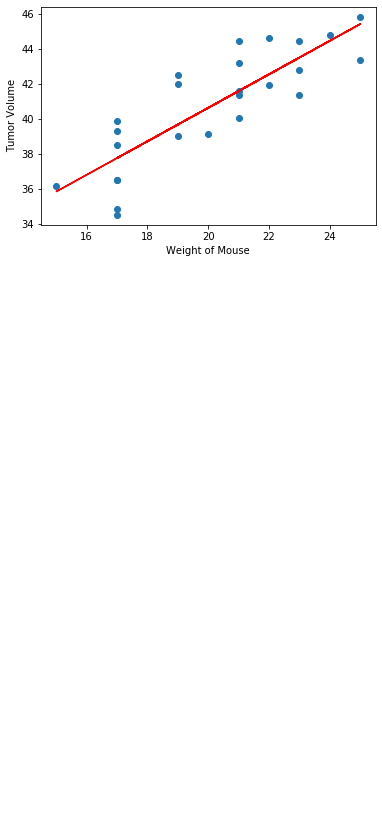

In [371]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(corr1,corr2)

regress_values = corr1 * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

plt.scatter(corr1,corr2)
plt.plot(corr1,regress_values,"r-")
plt.annotate(line_eq,(20, 0),fontsize=15,color="red")
plt.xlabel('Weight of Mouse')
plt.ylabel("Tumor Volume")

print(f"rvalue    = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")

plt.show()